In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Paths
base_path = '/Users/tanmaysingh/Desktop/ ai-project/cats_and_dogs'
train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')
test_dir = os.path.join(base_path, 'test')

# Image Parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 32
epochs = 10

# Count files
total_train = sum([len(files) for _, _, files in os.walk(train_dir)])
total_val = sum([len(files) for _, _, files in os.walk(validation_dir)])


In [106]:
# Data Generators
train_image_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

# Generators
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=batch_size
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=batch_size
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=base_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    classes=['test'],
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


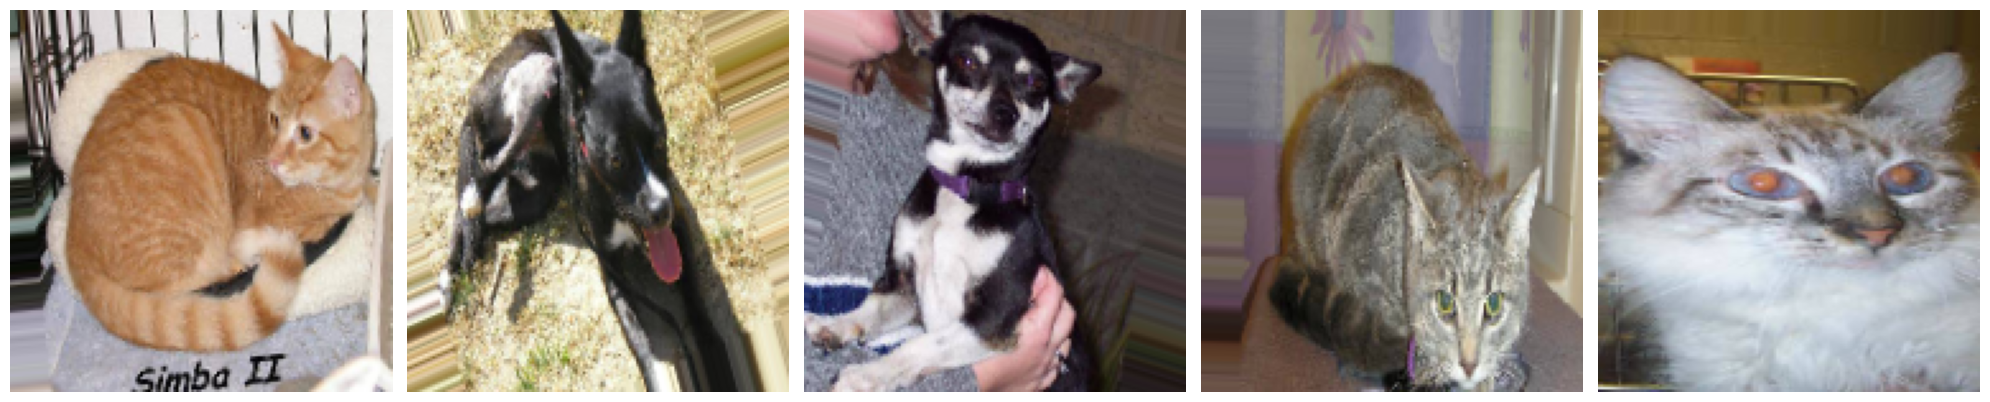

In [108]:
# Visualize augmentation
augmented_images = [train_data_gen[0][0][i] for i in range(5)]

def plotImages(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 5))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(augmented_images)


In [110]:
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(2)  # for SparseCategoricalCrossentropy
])

model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     2,367,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,460,930 (9.39 MB)

 Trainable params: 2,460,930 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.5244 - loss: 0.7687 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5938 - loss: 0.6785 - val_accuracy: 0.5010 - val_loss: 0.7024
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.5384 - loss: 0.6906 - val_accuracy: 0.6048 - val_loss: 0.6395
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6562 - loss: 0.6433 - val_accuracy: 0.6109 - val_loss: 0.6416
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.5961 - loss: 0.6515 - val_accuracy: 0.5202 - val_loss: 0.9633
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4375 - loss: 1.0839 - val_accuracy: 0.5665 - val_loss: 0.7147
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 294ms/step - accuracy: 0.6170 - loss: 0.6459 - val_accuracy: 0.5948 - val_loss: 0.6342
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4688 - loss: 0.6882 - val_accuracy: 0.

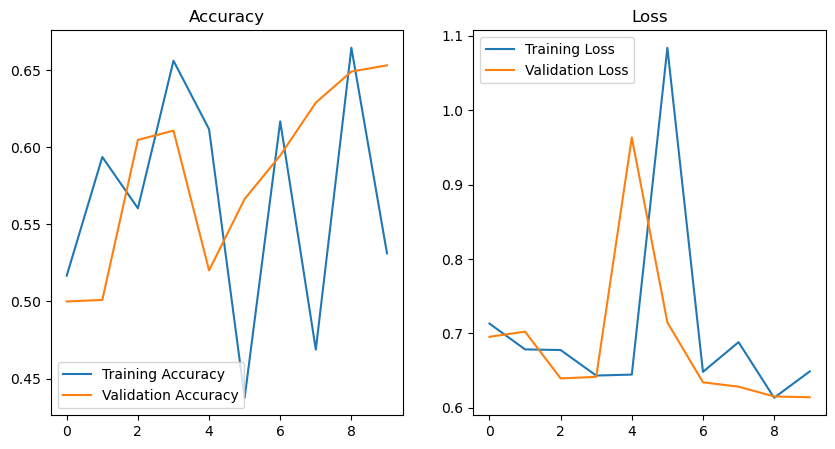

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x31d15c4a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


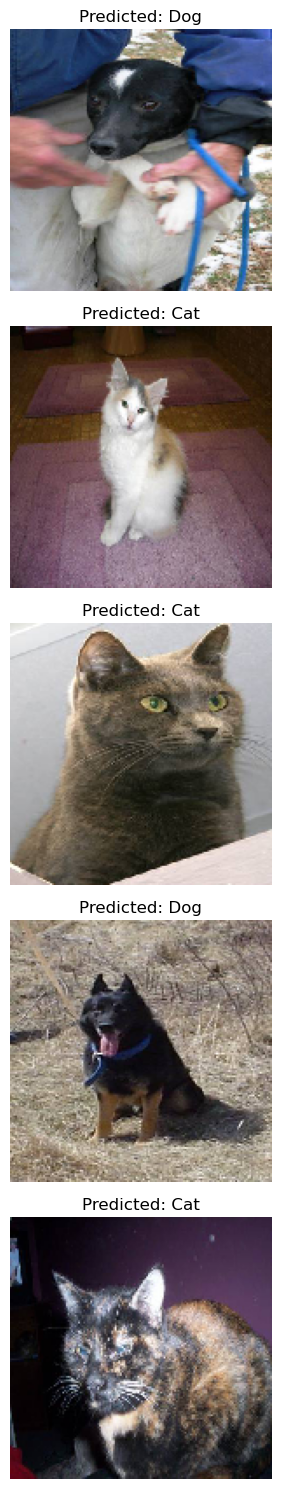

In [116]:
pred_logits = model.predict(test_data_gen)
probabilities = np.argmax(pred_logits, axis=-1)
test_images = next(test_data_gen)

def plotPredictions(images_arr, predictions):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5, len(images_arr) * 3))
    for img, pred, ax in zip(images_arr, predictions, axes):
        ax.imshow(img)
        ax.axis('off')
        label = "Dog" if pred == 1 else "Cat"
        ax.set_title(f"Predicted: {label}")
    plt.tight_layout()
    plt.show()

plotPredictions(test_images[:5], probabilities[:5])


In [118]:
answers = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
           1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
           1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
           1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
           0, 0, 0, 0, 0, 0]

correct = sum([1 for p, a in zip(probabilities[:len(answers)], answers) if p == a])
percentage_identified = (correct / len(answers)) * 100
passed_challenge = percentage_identified >= 63

print(f"\nModel identified {round(percentage_identified, 2)}% of images.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Improve the model further.")



Model identified 70.0% of images.
You passed the challenge!
